
# Penyusun

*   Nama  : Zhafran Pradistyatama Kuncoro
*   Email : zhafrankuncoro@gmail.com
*   ID DICODING: zhafrankuncoro / MC223D5Y0339
*   Link Dataset: [Dataset Film](https://www.kaggle.com/datasets/sayan0211/movie-recomendation-pjct/data)



# 1. Import Library
Pada bagian ini, dilakukan import berbagai library yang akan digunakan dalam proses pengolahan data, eksplorasi, pemodelan, hingga evaluasi model.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import seaborn as sns


# 2. Dataset

## 2.1 Mengunduh Dataset di Kaggle

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zhafrankuncoro","key":"def1d9e1641a89ea1be3b30a122f5d4c"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Ubah permission
!chmod 600 ~/.kaggle/kaggle.json

Perintah-perintah ini digunakan untuk menyiapkan file kaggle.json di lingkungan Google Colab agar Anda dapat menggunakan Kaggle API untuk mengunduh dataset atau berinteraksi dengan Kaggle.



In [4]:
# Unduh file zip
!kaggle datasets download -d sayan0211/movie-recomendation-pjct

# Ubah perintah unzip
!unzip /content/movie-recomendation-pjct.zip -d movie-dataset


Dataset URL: https://www.kaggle.com/datasets/sayan0211/movie-recomendation-pjct
License(s): unknown
  0% 0.00/846k [00:00<?, ?B/s]
100% 846k/846k [00:00<00:00, 918MB/s]
Archive:  /content/movie-recomendation-pjct.zip
  inflating: movie-dataset/movies.csv  
  inflating: movie-dataset/ratings.csv  


Perintah-perintah ini digunakan untuk mengunduh dan mengekstrak dataset dari Kaggle di Google Colab.



## 2.2 Load Dataset

Karena kita ingin membangund model content based filtering, maka kita hanya menggunakan dataset movies.csv

In [5]:
film = pd.read_csv('/content/movie-dataset/movies.csv')
film.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# 3. Data Understanding

In [6]:
# Menampilkan Dataset
film

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [7]:
# Menampilkan rinfkasan dataset
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
# Menampilkan statistik deskriptif
film.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [9]:
# Mengecek apakah ada missing value
film.isnull().sum()

,0
movieId,0
title,0
genres,0


In [10]:
film.duplicated().sum()

np.int64(0)

In [11]:
# Mengecek apakah terdapat data yang duplicated pada film
film.duplicated('title').sum()

np.int64(5)

In [12]:
# menampilkan dataset duplikat yang  berada di dkolom title

film[film.duplicated('title', keep=False)]

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [13]:
# Melihat jumlah genres
genre_counts_ringkas = film['genres'].str.split('|').explode().value_counts()


In [14]:
# Menampilkan jumlah genre
genre_counts_ringkas

,count
genres,
Drama,4361
Comedy,3756
Thriller,1894
Action,1828
Romance,1596
Adventure,1263
Crime,1199
Sci-Fi,980
Horror,978


<ipython-input-15-113db8ed47bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genre_counts_ringkas.values, y=genre_counts_ringkas.index, palette="viridis", orient='h')


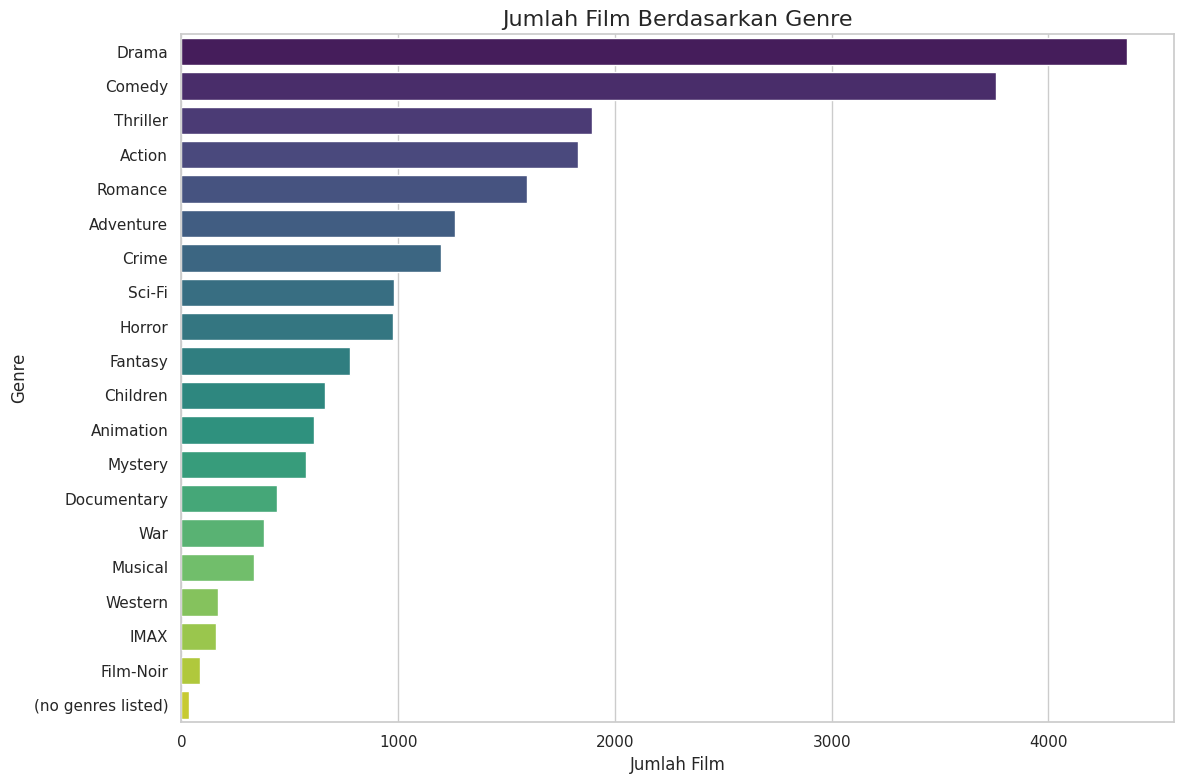

In [15]:
# 1. Atur tema dan ukuran plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# 2. Buat bar plot dengan Seaborn
ax = sns.barplot(x=genre_counts_ringkas.values, y=genre_counts_ringkas.index, palette="viridis", orient='h')

# 3. Tambahkan judul dan label
ax.set_title('Jumlah Film Berdasarkan Genre', fontsize=16)
ax.set_xlabel('Jumlah Film', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)

# 4. Tampilkan plot
plt.tight_layout()
plt.show()

## Insight

* Dataset Movies memiliki 3 kolom dan 9742 baris
* Missing Value: Tidak terdapat missing value pada dataset
* Data Duplikat: Jika kita lihat pada awal pengecekan tidak ada data yang duplikat, akan tetapi jika kita cek di kolom 'title' terdapat 5 baris data yang duplikat, mengatasi duplikat dapat di drop saja karna jumlah nya hanya sedikit.
* Genre terbanyak pada dataset ini adalah Drama dan di ikuti oleh comedy, thtriller, actiom dst (dapat dilihat pada grafik/ tabel)
* Akan menggunakan kolom genre dan title, kolom movieid tidak akan digunakan karena kita akan melakukan rekomendasi berdasarkan genre
* Pada kolom genre masih terpisahkan dengan '|' kita akan membuat menjadi list seperti ini Contohnya, 'Action|Adventure|Sci-Fi' akan menjadi ['Action', 'Adventure', 'Sci-Fi']. Tujuannya agar melakukan one hot encoding lebih mudah.

# 3. Data Preparation

## 3.1 Mengatasi masalah

In [16]:
# Drop data duplikat yang ada di kolom 'title'
film = film.drop_duplicates('title')
len(film)

9737

In [17]:
# Memilih hanya kolom 'title' dan 'genres'
film_final = film[['title', 'genres']]

# Menampilkan 5 baris pertama dari subset
film_final.head()


,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


## 3.2 Melakukan one hot encoding

In [18]:
# Pisahkan genre menjadi list
film_final['genres'] = film_final['genres'].str.split('|')

# Identifikasi genre unik
all_genres = set()
for genres in film_final['genres']:
    all_genres.update(genres)
all_genres = sorted(list(all_genres))  # Urutkan untuk konsistensi

# Fungsi untuk membuat vektor one-hot encoding
def genres_to_vector(genres):
    return [1 if genre in genres else 0 for genre in all_genres]

# Terapkan one-hot encoding
film_final['genre_vector'] = film_final['genres'].apply(genres_to_vector)

<ipython-input-18-8107f0dc5f4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_final['genres'] = film_final['genres'].str.split('|')


In [19]:
film_final

,title,genres,genre_vector
0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,Jumanji (1995),"[Adventure, Children, Fantasy]","[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,Grumpier Old Men (1995),"[Comedy, Romance]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4,Father of the Bride Part II (1995),[Comedy],"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
9737,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]","[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
9738,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]","[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
9739,Flint (2017),[Drama],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
9740,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# 4. Modeling

In [20]:
# Konversi genre_vector ke sparse matrix untuk efisiensi
genre_matrix = np.array(list(film_final['genre_vector']))
sparse_genre_matrix = csr_matrix(genre_matrix)

## 4.1 Rekomendasi Berdasarkan Input Film

In [21]:
# Fungsi untuk merekomendasikan film
def recommend_movies(movie_title, df, genre_matrix, top_n=5):
    try:
        # Cari indeks film yang dipilih
        movie_idx = df[df['title'] == movie_title].index[0]

        # Ambil vektor genre dari film yang dipilih
        movie_vector = genre_matrix[movie_idx]

        # Hitung cosine similarity dengan semua film
        similarities = cosine_similarity(movie_vector, genre_matrix)[0]

        # Dapatkan indeks film dengan kemiripan tertinggi
        similar_indices = similarities.argsort()[-top_n-1:-1][::-1]  # Ambil top_n, abaikan film itu sendiri

        # Kembalikan judul, genre, dan skor kemiripan
        recommendations = df.iloc[similar_indices][['title', 'genres']].copy()
        recommendations['similarity_score'] = similarities[similar_indices]

        return recommendations
    except IndexError:
        return f"Film '{movie_title}' tidak ditemukan di dataset."


In [56]:
# Contoh penggunaan
movie_title = "Jumanji (1995)"
print(f"Rekomendasi untuk '{movie_title}':")
recommendations = recommend_movies(movie_title, film_final, sparse_genre_matrix, top_n=20)
recommendations

Rekomendasi untuk 'Jumanji (1995)':


,title,genres,similarity_score
8230,Percy Jackson: Sea of Monsters (2013),"[Adventure, Children, Fantasy]",1.0
8800,Pan (2015),"[Adventure, Children, Fantasy]",1.0
1618,"NeverEnding Story II: The Next Chapter, The (1...","[Adventure, Children, Fantasy]",1.0
109,"NeverEnding Story III, The (1994)","[Adventure, Children, Fantasy]",1.0
8719,The Cave of the Golden Rose (1991),"[Adventure, Children, Fantasy]",1.0
767,Escape to Witch Mountain (1975),"[Adventure, Children, Fantasy]",1.0
6751,"Chronicles of Narnia: Prince Caspian, The (2008)","[Adventure, Children, Fantasy]",1.0
6655,"Water Horse: Legend of the Deep, The (2007)","[Adventure, Children, Fantasy]",1.0
6389,Bridge to Terabithia (2007),"[Adventure, Children, Fantasy]",1.0
6075,"Chronicles of Narnia: The Lion, the Witch and ...","[Adventure, Children, Fantasy]",1.0


## 4.2 Rekomendasi Berdasarkan Input Genre

In [23]:
# Fungsi rekomendasi Berdasarkan genre
def recommend_movies_by_genres(input_genres, df, genre_matrix, all_genres, top_n=5, exact_match=False):
    try:
        # Ubah input genre menjadi list (misalnya, "Action, Comedy" -> ["Action", "Comedy"])
        input_genres = [genre.strip() for genre in input_genres.split(',')]

        # Validasi genre
        invalid_genres = [genre for genre in input_genres if genre not in all_genres]
        if invalid_genres:
            return f"Genre tidak valid: {invalid_genres}. Genre yang tersedia: {all_genres}"

        # Buat vektor one-hot encoding untuk input genre
        input_vector = np.array([[1 if genre in input_genres else 0 for genre in all_genres]])

        # Hitung cosine similarity antara input dan semua film
        similarities = cosine_similarity(input_vector, genre_matrix)[0]

        # Jika exact_match=True, hanya rekomendasikan film yang mengandung semua genre input
        if exact_match:
            mask = df['genres'].apply(lambda x: all(genre in x for genre in input_genres))
            if not mask.any():
                return f"Tidak ada film yang mengandung semua genre: {input_genres}"
            similar_indices = similarities[mask].argsort()[-top_n:][::-1]
            recommendations = df[mask].iloc[similar_indices][['title', 'genres']].copy()
            recommendations['similarity_score'] = similarities[mask][similar_indices]
        else:
            # Ambil top_n film dengan kemiripan tertinggi
            similar_indices = similarities.argsort()[-top_n:][::-1]
            recommendations = df.iloc[similar_indices][['title', 'genres']].copy()
            recommendations['similarity_score'] = similarities[similar_indices]

        return recommendations
    except Exception as e:
        return f"Terjadi kesalahan: {str(e)}"


In [30]:
# Rekomendasi Berdasarkan genre
input_genres = "Adventure, Children, Fantasy"
print(f"\nRekomendasi untuk genre: {input_genres}")
recommendations_by_genres = recommend_movies_by_genres(input_genres, film_final, sparse_genre_matrix, all_genres, top_n=20, exact_match=False)
recommendations_by_genres



Rekomendasi untuk genre: Adventure, Children, Fantasy


,title,genres,similarity_score
8641,Seventh Son (2014),"[Adventure, Children, Fantasy]",1.0
8230,Percy Jackson: Sea of Monsters (2013),"[Adventure, Children, Fantasy]",1.0
8800,Pan (2015),"[Adventure, Children, Fantasy]",1.0
1618,"NeverEnding Story II: The Next Chapter, The (1...","[Adventure, Children, Fantasy]",1.0
109,"NeverEnding Story III, The (1994)","[Adventure, Children, Fantasy]",1.0
8719,The Cave of the Golden Rose (1991),"[Adventure, Children, Fantasy]",1.0
767,Escape to Witch Mountain (1975),"[Adventure, Children, Fantasy]",1.0
6751,"Chronicles of Narnia: Prince Caspian, The (2008)","[Adventure, Children, Fantasy]",1.0
6655,"Water Horse: Legend of the Deep, The (2007)","[Adventure, Children, Fantasy]",1.0
6389,Bridge to Terabithia (2007),"[Adventure, Children, Fantasy]",1.0


# Evaluation

* Melakukan perhitungan dengan menggunakan metrik precision untuk melihat akurasi

## 5.1 Rekomendasi pertama: Menghasilkan output yang memuaskan dan sesuai dengan input judul film

In [71]:
# Pilih satu film yang ingin Anda uji
movie_to_test = 'Jumanji (1995)'
# Tentukan berapa banyak rekomendasi yang ingin dievaluasi
K = 20

print(f"--- Memulai Evaluasi untuk Film: '{movie_to_test}' ---")

recommendations_df = recommend_movies(
    movie_title=movie_to_test,
    df=film_final,
    genre_matrix=sparse_genre_matrix,
    top_n=K
)
# Ambil hanya judulnya saja ke dalam sebuah set
recommended_titles = set(recommendations_df['title'])
print(f"Model merekomendasikan {len(recommended_titles)} film.")


try:
    target_genres_list = film_final.loc[film_final['title'] == movie_to_test, 'genres'].iloc[0]


    mask = film_final['genres'].apply(lambda genre_list_in_row: genre_list_in_row == target_genres_list)
    relevant_titles = set(film_final.loc[mask & (film_final['title'] != movie_to_test), 'title'])
    print(f"Ditemukan {len(relevant_titles)} film lain yang genrenya sama persis (relevan).")

except IndexError:
    print(f"Film '{movie_to_test}' tidak ditemukan dalam dataset.")
    relevant_titles = set()


if relevant_titles:
    true_positives = len(recommended_titles.intersection(relevant_titles))

    precision = true_positives / K if K > 0 else 0

    recall = true_positives / len(relevant_titles) if len(relevant_titles) > 0 else 0

    print("\n--- Hasil Perhitungan Metrik (Nilai dari Guru) ---")
    print(f"Jumlah Rekomendasi (K)          : {K}")
    print(f"Jumlah Prediksi Benar (TP)      : {true_positives}")
    print(f"Total Film yang Sebenarnya Relevan: {len(relevant_titles)}")
    print("-" * 45)
    print(f"Precision@{K} : {precision:.1%}")
    print(f"Recall@{K}    : {recall:.1%}")
else:
    print("\nTidak dapat menghitung metrik karena tidak ada item relevan yang ditemukan.")

--- Memulai Evaluasi untuk Film: 'Jumanji (1995)' ---
Model merekomendasikan 20 film.
Ditemukan 23 film lain yang genrenya sama persis (relevan).

--- Hasil Perhitungan Metrik (Nilai dari Guru) ---
Jumlah Rekomendasi (K)          : 20
Jumlah Prediksi Benar (TP)      : 19
Total Film yang Sebenarnya Relevan: 23
---------------------------------------------
Precision@20 : 95.0%
Recall@20    : 82.6%


## 5.2 Rekomendasi kedua: Menghasilkan output yang memuaskan dan sesuai dengan input genre

In [70]:
# Mari kita uji output dari fungsi rekomendasi genre
input_genres_to_test = "Adventure, Children, Fantasy"
K = 20 # 20 rekomendasi di

print(f"--- Memulai Evaluasi untuk Genre: '{input_genres_to_test}' ---")

recommendations_df = recommend_movies_by_genres(
    input_genres=input_genres_to_test,
    df=film_final,
    genre_matrix=sparse_genre_matrix,
    all_genres=all_genres,
    top_n=K
)
recommended_titles = set(recommendations_df['title'])
print(f"Model merekomendasikan {len(recommended_titles)} film.")

#
input_genres_list = [genre.strip() for genre in input_genres_to_test.split(',')]
mask = film_final['genres'].apply(lambda x: all(g in x for g in input_genres_list))
relevant_titles = set(film_final[mask]['title'])
print(f"Ditemukan {len(relevant_titles)} film yang relevan di seluruh dataset.")

# -
true_positives = len(recommended_titles.intersection(relevant_titles))

precision = true_positives / K if K > 0 else 0
recall = true_positives / len(relevant_titles) if len(relevant_titles) > 0 else 0

print("\n--- Hasil Perhitungan Metrik (Nilai dari Guru) ---")
print(f"Jumlah Rekomendasi (K)          : {K}")
print(f"Jumlah Prediksi Benar (TP)      : {true_positives}")
print(f"Total Film yang Sebenarnya Relevan: {len(relevant_titles)}")
print("-" * 45)
print(f"Precision@{K} : {precision:.1%}")
print(f"Recall@{K}    : {recall:.1%}")

--- Memulai Evaluasi untuk Genre: 'Adventure, Children, Fantasy' ---
Model merekomendasikan 20 film.
Ditemukan 124 film yang relevan di seluruh dataset.

--- Hasil Perhitungan Metrik (Nilai dari Guru) ---
Jumlah Rekomendasi (K)          : 20
Jumlah Prediksi Benar (TP)      : 20
Total Film yang Sebenarnya Relevan: 124
---------------------------------------------
Precision@20 : 100.0%
Recall@20    : 16.1%
